In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Soru 1

Bir astronot, Dünya'dan ışık yılı uzakta bulunan bir yıldız sistemini keşfetti. Yıldız sistemindeki iki gezegenin konumunu birer Numpy dizisi olarak kaydetti. Astronot, gezegenler arasındaki mesafeyi Euclidean mesafesi kullanarak hesaplamak istiyor. Bir program yazın ve gezegenler arasındaki mesafeyi hesaplayın.

Açıklama:

          Birinci Gezegen Konumu: x1,y1,z1, İkinci Gezegen Konumu: x2,y2,z2 şeklindedir.

          Euclidean mesafesini hesaplamak için aşağıdaki verilen denkleme göre fonksiyon yazınız.
          
          Yazmış olduğunuz programı değerler girerek test ediniz.  
          
Euclidean mesafesi:
\begin{equation}
\sqrt((x1-x2)^2 + (y1-y2)^2 + (z1-z2)^2)
\end{equation}


# Cevap 1

In [ ]:
def euclidean_distance(planet1, planet2):
    x1, y1, z1 = planet1
    x2, y2, z2 = planet2
    distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)
    return distance

x1 = float(input("Birinci Gezegen x koordinatı: "))
y1 = float(input("Birinci Gezegen y koordinatı: "))
z1 = float(input("Birinci Gezegen z koordinatı: "))

x2 = float(input("İkinci Gezegen x koordinatı: "))
y2 = float(input("İkinci Gezegen y koordinatı: "))
z2 = float(input("İkinci Gezegen z koordinatı: "))

planet1 = np.array([x1, y1, z1])
planet2 = np.array([x2, y2, z2])
distance = euclidean_distance(planet1, planet2)

print(f"Gezegenler arasındaki Euclidean mesafesi: {distance}")


Birinci Gezegen x koordinatı: 3.6
Birinci Gezegen y koordinatı: 4.2
Birinci Gezegen z koordinatı: 5.1
İkinci Gezegen x koordinatı: 2.4
İkinci Gezegen y koordinatı: 2.1
İkinci Gezegen z koordinatı: 5.1
Gezegenler arasındaki Euclidean mesafesi: 2.418677324489565


# Soru 2

Akciğer kanseri nedenleri ile ilgili araştırma yapılmak istenmektedir. Bu sebeple hastalardan veriler toplanmakta ve "cancer patient data sets" isimli veri seti oluşturulmaktadır. Bu veri setindeki değerler Pandas kütüphanesi kullanılarak analiz edilmesi istenmektedir.

In [ ]:
#Veri setini import edin.

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/cancer_patient_data_sets.csv'
# DataFrame
df = pd.read_csv(file_path)
print(df)


     index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk

In [ ]:
#Veri setinde sütunları bulunuz.

In [ ]:
columns = df.columns
print("Veri Setindeki Sütunlar:")
print(columns)

Veri Setindeki Sütunlar:
Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [ ]:
#Gender'a göre grouplama yapınız ve toplamlarını bulunuz.

In [ ]:
"""
# 'Gender' sütununa göre gruplama ve diğer sütunların toplamlarını bulma
gender_totals = df.groupby('Gender').sum()

print("Gender'a Göre Toplamlar:")
print(gender_totals)
"""

gender_counts = df['Gender'].value_counts()
print("Cinsiyet Dağılımı:")
print(gender_counts)


Cinsiyet Dağılımı:
1    598
2    402
Name: Gender, dtype: int64


## Soru 2-1

1 numaralı Gender'ın 2 numaralı Gender'a göre toplam Genetic Risk durum oranını bulunuz.

## Cevap 2-1

In [ ]:
genetic_risk= df.groupby('Gender')['Genetic Risk'].sum()
genetic_risk_ratio = genetic_risk[1] / genetic_risk[2]
print("1'in 2'ye Göre Genetic Risk Durum Oranı:", genetic_risk_ratio)


1'in 2'ye Göre Genetic Risk Durum Oranı: 1.8464885021752642


## Soru 2-2

30 yaşından büyük Low Level hastaların Dry Cough toplamı ile 30 yaşından büyük High Level hastaların Dry Cough toplamı oranını bulunuz.

## Cevap 2-2

In [ ]:
patients_over_30 = df[df['Age'] > 30]

low_level= patients_over_30[patients_over_30['Level'] == 'Low']['Dry Cough'].sum()
high_level= patients_over_30[patients_over_30['Level'] == 'High']['Dry Cough'].sum()

ratio = low_level / high_level

print("oran:", ratio)


oran: 0.3686635944700461


## Soru 2-3

İlgili veri setinde hastalığa sebep olan baskın öznitelikler çıkarılmaktadır.

Bu öznitelikler sırasıyla

a: Air Pollution, b: Alcohol use, c: Smoking, d: Genetic Risk olarak bulunmuştur.   

y = 2 * a + 3 * b + 4 * c + d şeklinde bir fonksiyon yazılarak ilgili hasta için y risk değeri hesaplanmaktadır.

y risk değeri 50'den büyük olan hastaların Patient Id'lerini bulunuz.

## Cevap 2-3

In [ ]:
# Risk fonksiyonu
def calculate_risk(row):
    a = row['Air Pollution']
    b = row['Alcohol use']
    c = row['Smoking']
    d = row['Genetic Risk']

    return 2*a + 3*b + 4*c + d

df['Risk'] = df.apply(calculate_risk, axis=1)

high_risk_patients = df[df['Risk'] > 50]['Patient Id']

print("Patient Id'leri:")
print(high_risk_patients)


Patient Id'leri:
3      P1000
4       P101
8       P105
10      P107
11      P108
       ...  
993     P993
994     P994
995     P995
996     P996
998     P998
Name: Patient Id, Length: 325, dtype: object


## Soru 2-4

Cinsiyete (Gender) göre gruplama yaparak plotbar() fonksiyonu ile 1 ve 2 numaralı Gender için kansere sebep olan Air Pollution, Obesity, Smoking ve Snooring faktörlerinin toplamlarını aynı grafik üzerinde çizdiriniz.

Dikkat: Grafik ismini, axes isimlerini, legend isimlerini yazmayı unutmayalım.

## Cevap 2-4

<ipython-input-25-ca580b9370f8>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_grouped = df.groupby('Gender').sum()


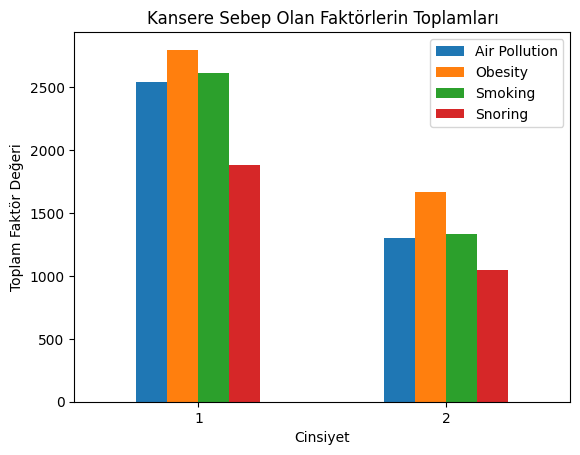

In [ ]:
# grupla
gender_grouped = df.groupby('Gender').sum()
factors = ['Air Pollution', 'Obesity', 'Smoking', 'Snoring']

ax = gender_grouped.loc[[1, 2], factors].plot.bar(rot=0)

ax.set_title('Kansere Sebep Olan Faktörlerin Toplamları')
ax.set_xlabel('Cinsiyet')
ax.set_ylabel('Toplam Faktör Değeri')
ax.legend(['Air Pollution', 'Obesity', 'Smoking', 'Snoring'])
plt.show()
